In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from collections import defaultdict

In [2]:
!pwd

/home/jacquemi/working_dir/Rat_sscx_nissl/rat_sscx_nissl_analysis/Notebooks


In [3]:
def plot(df, title, display_legend=False):
    
    image_names = np.unique(df['image'] )
    
    # compute the average cell density
    densities=defaultdict(list)
    
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[1,2]]
        for depth, value  in zip(image_data[:,0],image_data[:,1]):
            densities[depth].append(value)
            
    average={}
    median={}
    for key, value in densities.items():
        average[key] = np.average(value)
        median[key] = np.median(value)
    
    plt.figure(figsize=(5,5))
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[0,1,2]]
        plt.plot(image_data[:,2], image_data[:,1])
        
    plt.plot(list(average.values()), list(average.keys()), linewidth=5, c='y', label='average values')
    plt.plot(list(median.values()),list(median.keys()), linewidth=5, c='black', label='median values')
    plt.title(f'{title} Cell density as a function of SSCX region percentage of depth.')
    plt.gca().set_ylabel("SSCX region percentage of depth")
    plt.gca().set_xlabel("Cell density cells/mm3")
    plt.gca().invert_yaxis()
    
    if display_legend:
        lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
        for i in range(1):
            lgnd.legendHandles[i]._sizes = [5]
            lgnd.legendHandles[i]._alpha = 1 

In [4]:
def concate_density_dataframes(df_directory_path, std_dev_factor = 1):
    """
    conctact dataframe locatated in a directory and filter the density value with std_dev_factor
    """
    df = pd.DataFrame()
    densities = []
    
    file_list = glob.glob(df_directory_path)
    for file in file_list:
        df_image = pd.read_csv(file, index_col=0)
        densities.append(df_image.densities)
        
    densities_mean = np.mean(densities)
    std_dev = np.std(densities) * 1
    print(densities_mean, std_dev)
    df = pd.DataFrame()
    frames = []
    for file in file_list:
        df_image = pd.read_csv(file, index_col=0)
        if np.mean(df_image.densities) < std_dev:
            print(np.unique(df_image.image))
        else:
            frames.append(df_image)
    
    return pd.concat(frames)
        


In [5]:
df = concate_density_dataframes('/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Density/01242024/Per_percentage//*.csv')

82613.61433704545 18980.01521230611


/tmp/ipykernel_3833/1569005853.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._sizes = [5]
/tmp/ipykernel_3833/1569005853.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._alpha = 1


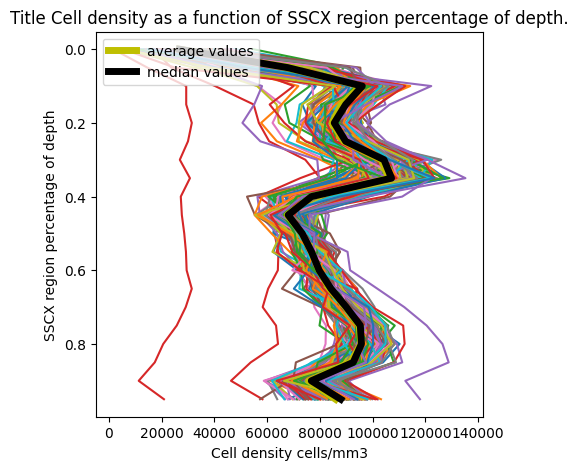

In [6]:
plot(df, 'Title', display_legend=True)

In [7]:
def plot_mean_and_std_dev(_df):
    percentage = np.unique(_df.depth_percentage)
    densities = np.array(list(_df.groupby('depth_percentage')['densities'].apply(list).values))
    
    density_std = np.std(densities, axis=1)
    density_mean = densities.mean(axis=1)
    
    print(f' percentage {percentage.shape}, densities {densities.shape}, density_std {density_std.shape}, density_mean {density_mean.shape}')
    
    plt.plot (density_mean, percentage)
    plt.fill_betweenx(percentage,density_mean-density_std,density_mean+density_std,alpha=.1)
    plt.gca().invert_yaxis()
    

 percentage (20,), densities (20, 185), density_std (20,), density_mean (20,)


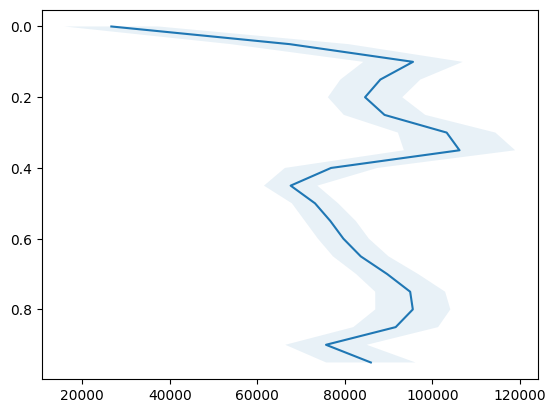

In [8]:
plot_mean_and_std_dev(df)